#Steps Summary

In [0]:
# 1. Mount google drive
# 2. Import all modules and libraries
# 3. Set the directory path of google drive
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test



**1. Mount google drive**




In [1]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




**2.   Import all required modules**




In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np
!pip install albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-hthhgzxo
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-hthhgzxo
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=2dbfaf25cc63f46c7bc8b71f8d5c55ceb940d9b3383e5110a5b4432806a46281
  Stored in directory: /tmp/pip-ephem-wheel-cache-o3w5zyus/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


**3. Set the modules homepath and library path**

In [4]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
albumentation_resnet18_cifar10_main.ipynb  outputs
data					   resnet18_cifar10_main.ipynb
EVA-4-S9-Suman-Kanukollu-Main.ipynb	   root
lib					   sampleImages
models					   utils
['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Set Device**

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
print(torch.cuda.is_available())

cuda
True


**5. Import All reusable modules**

In [0]:
from models import resnet
from lib.loadDataSet import dataSetFunctions
from utils.showimgs import utils_showimgs

**6. Load transformations**

In [0]:
dsObj = dataSetFunctions()
transform_train, transform_test = dsObj.albumentationTransformations()

In [8]:
import albumentations as A
dir(A.Rotate)
#A.RGBShift

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_target_function',
 '_to_dict',
 'add_targets',
 'apply',
 'apply_to_bbox',
 'apply_to_bboxes',
 'apply_to_keypoint',
 'apply_to_keypoints',
 'apply_to_mask',
 'apply_to_masks',
 'apply_with_params',
 'call_backup',
 'get_base_init_args',
 'get_class_fullname',
 'get_dict_with_id',
 'get_params',
 'get_params_dependent_on_targets',
 'get_transform_init_args',
 'get_transform_init_args_names',
 'set_deterministic',
 'target_dependence',
 'targets',
 'targets_as_params',
 'update_params']

**7. Load dataset**

In [9]:
(trainset,testset)          = dsObj.dataSet(transform=(transform_train, transform_test),name='cifar10')
(train_loader,test_loader)  = dsObj.dataLoader(trainDataset=trainset,testDataset=testset)


### Preparing dataset for the name : cifar10
Files already downloaded and verified
Files already downloaded and verified

### Loading data from dataset


**8. Load classes**

In [10]:
dsObj.dataSetClasses(trainset)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**9. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([3, 4, 3, 4, 3, 2, 5, 0, 3, 6, 1, 2, 2, 9, 5, 8, 4, 1, 5, 1, 5, 1, 9, 6,
        7, 9, 9, 0, 7, 0, 9, 7, 3, 2, 9, 5, 5, 0, 1, 9, 2, 8, 3, 3, 4, 2, 2, 4,
        5, 4, 0, 2, 5, 0, 1, 0, 8, 7, 0, 7, 6, 1, 5, 0, 5, 3, 6, 3, 6, 1, 1, 0,
        3, 8, 2, 0, 5, 7, 7, 7, 8, 3, 4, 9, 4, 3, 5, 7, 6, 7, 3, 1, 1, 7, 6, 2,
        4, 5, 8, 8, 6, 9, 7, 6, 0, 9, 0, 8, 9, 6, 7, 0, 3, 8, 4, 3, 1, 0, 5, 2,
        8, 7, 3, 5, 7, 4, 3, 8])
       cat       deer        cat       deer


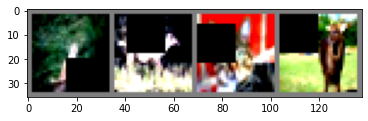

In [11]:
#from utils.showimgs import utils_showimgs
utObj = utils_showimgs()

utObj.getRandomTrainImgs(trainset,train_loader)

**10. Load Resnet18 model on to respective device (GPU or CPU) and print summary**

In [12]:
from models import resnet
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**11. Define loss function and optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**12. Run Train and Test**

In [14]:
from lib import trainTestMethods
for epoch in range(5):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 92ms | Tot: 54s546ms | Train >> Loss: 1.727 | Acc: 36.292% (18146/50000) 391/391 
 [================================================================>]  Step: 61ms | Tot: 3s511ms | Test >> Loss: 1.366 | Acc: 49.340% (4934/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 92ms | Tot: 55s43ms | Train >> Loss: 1.396 | Acc: 49.268% (24634/50000) 391/391 
 [================================================================>]  Step: 65ms | Tot: 3s476ms | Test >> Loss: 1.179 | Acc: 57.680% (5768/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 89ms | Tot: 55s220ms | Train >> Loss: 1.224 | Acc: 56.130% (28065/50000) 391/391 
 [================================================================>]  Step: 61ms | Tot: 3s562ms | Test >> Loss: 1.016 | Acc: 63.940% (6394/10000) 79/79 

Epoch: 3
 [==========================

In [15]:
for epoch in range(5,10):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 5
 [================================================================>]  Step: 91ms | Tot: 54s307ms | Train >> Loss: 0.943 | Acc: 66.446% (33223/50000) 391/391 
 [================================================================>]  Step: 62ms | Tot: 3s525ms | Test >> Loss: 0.781 | Acc: 72.960% (7296/10000) 79/79 

Epoch: 6
 [================================================================>]  Step: 91ms | Tot: 55s117ms | Train >> Loss: 0.884 | Acc: 68.942% (34471/50000) 391/391 
 [================================================================>]  Step: 61ms | Tot: 3s509ms | Test >> Loss: 0.803 | Acc: 72.220% (7222/10000) 79/79 

Epoch: 7
 [================================================================>]  Step: 91ms | Tot: 55s42ms | Train >> Loss: 0.832 | Acc: 70.582% (35291/50000) 391/391 
 [================================================================>]  Step: 66ms | Tot: 3s456ms | Test >> Loss: 0.724 | Acc: 74.490% (7449/10000) 79/79 

Epoch: 8
 [==========================

In [16]:
for epoch in range(10,21):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 10
 [================================================================>]  Step: 92ms | Tot: 54s744ms | Train >> Loss: 0.715 | Acc: 74.874% (37437/50000) 391/391 
 [================================================================>]  Step: 66ms | Tot: 3s476ms | Test >> Loss: 0.658 | Acc: 77.880% (7788/10000) 79/79 

Epoch: 11
 [================================================================>]  Step: 93ms | Tot: 55s187ms | Train >> Loss: 0.678 | Acc: 76.250% (38125/50000) 391/391 
 [================================================================>]  Step: 61ms | Tot: 3s522ms | Test >> Loss: 0.601 | Acc: 79.610% (7961/10000) 79/79 

Epoch: 12
 [================================================================>]  Step: 97ms | Tot: 55s133ms | Train >> Loss: 0.648 | Acc: 77.324% (38662/50000) 391/391 
 [================================================================>]  Step: 70ms | Tot: 3s466ms | Test >> Loss: 0.591 | Acc: 79.540% (7954/10000) 79/79 

Epoch: 13
 [=====================

In [17]:
for epoch in range(21,31):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 21
 [================================================================>]  Step: 94ms | Tot: 55s120ms | Train >> Loss: 0.469 | Acc: 83.838% (41919/50000) 391/391 
 [================================================================>]  Step: 66ms | Tot: 3s527ms | Test >> Loss: 0.543 | Acc: 82.480% (8248/10000) 79/79 

Epoch: 22
 [================================================================>]  Step: 97ms | Tot: 55s175ms | Train >> Loss: 0.455 | Acc: 84.302% (42151/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s595ms | Test >> Loss: 0.554 | Acc: 82.300% (8230/10000) 79/79 

Epoch: 23
 [================================================================>]  Step: 94ms | Tot: 55s126ms | Train >> Loss: 0.436 | Acc: 84.950% (42475/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s484ms | Test >> Loss: 0.496 | Acc: 83.810% (8381/10000) 79/79 

Epoch: 24
 [=====================

In [19]:
for epoch in range(31,41):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 31
 [================================================================>]  Step: 94ms | Tot: 54s826ms | Train >> Loss: 0.353 | Acc: 87.944% (43972/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s470ms | Test >> Loss: 0.454 | Acc: 85.960% (8596/10000) 79/79 

Epoch: 32
 [================================================================>]  Step: 94ms | Tot: 55s191ms | Train >> Loss: 0.348 | Acc: 88.062% (44031/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s578ms | Test >> Loss: 0.481 | Acc: 85.280% (8528/10000) 79/79 

Epoch: 33
 [================================================================>]  Step: 94ms | Tot: 55s287ms | Train >> Loss: 0.350 | Acc: 87.994% (43997/50000) 391/391 
 [================================================================>]  Step: 66ms | Tot: 3s599ms | Test >> Loss: 0.568 | Acc: 83.790% (8379/10000) 79/79 

Epoch: 34
 [=====================

In [20]:
for epoch in range(41,51):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 41
 [================================================================>]  Step: 91ms | Tot: 55s232ms | Train >> Loss: 0.303 | Acc: 89.698% (44849/50000) 391/391 
 [================================================================>]  Step: 62ms | Tot: 3s485ms | Test >> Loss: 0.474 | Acc: 85.950% (8595/10000) 79/79 

Epoch: 42
 [================================================================>]  Step: 97ms | Tot: 55s358ms | Train >> Loss: 0.286 | Acc: 90.182% (45091/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s500ms | Test >> Loss: 0.477 | Acc: 86.070% (8607/10000) 79/79 

Epoch: 43
 [================================================================>]  Step: 94ms | Tot: 55s208ms | Train >> Loss: 0.289 | Acc: 90.046% (45023/50000) 391/391 
 [================================================================>]  Step: 68ms | Tot: 3s461ms | Test >> Loss: 0.455 | Acc: 86.360% (8636/10000) 79/79 

Epoch: 44
 [=====================

In [21]:
for epoch in range(51,61):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 51
 [================================================================>]  Step: 90ms | Tot: 55s329ms | Train >> Loss: 0.256 | Acc: 91.134% (45567/50000) 391/391 
 [================================================================>]  Step: 65ms | Tot: 3s481ms | Test >> Loss: 0.494 | Acc: 86.510% (8651/10000) 79/79 

Epoch: 52
 [================================================================>]  Step: 93ms | Tot: 55s151ms | Train >> Loss: 0.251 | Acc: 91.406% (45703/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s538ms | Test >> Loss: 0.468 | Acc: 86.840% (8684/10000) 79/79 

Epoch: 53
 [================================================================>]  Step: 94ms | Tot: 55s107ms | Train >> Loss: 0.249 | Acc: 91.446% (45723/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s504ms | Test >> Loss: 0.428 | Acc: 87.370% (8737/10000) 79/79 

Epoch: 54
 [=====================

**13. Grad-CAM**

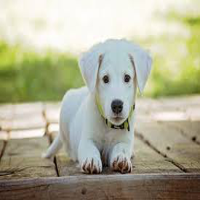

In [22]:
import os
sys.path.append(os.path.join(homepath,'sampleImages'))
imagename = 'dog1.jpg'
pil_img = utObj.loadImage(os.path.join(homepath,'sampleImages'), imagename)
pil_img.resize(size=(200,200))

In [0]:
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam

In [24]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [25]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [26]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from torchvision.utils import make_grid
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

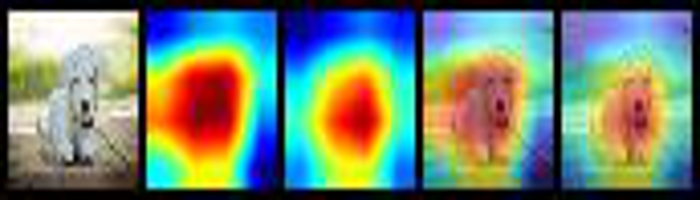

In [28]:
pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename='dog6_gradCam.jpg')

pilimg.resize((700,200))